1. El objetivo de este ejercicio es actualizar nuestras creencias sobre los modelos causales
alternativos luego de observar un conjunto datos, P (Modelo|Datos).

Tengo r que es en que caja esta el premio, s es la caja que el presentador señala y c la caja que yo habia elegido.



1.1  Definir la distribucion de creencia conjunta como producto de las
distribuciones condicionales del modelo

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Primero defino probabilidades de los parametros, segun cada modelo

def pr(r): #igual en ambos
    return 1/3

def pc(c): #igual en ambos
    return 1/3

def ps_rM0(s,r): #modelo base
    return (r!=s) * 1/2

def ps_rcM1(s,r,c): #modelo Monty Hall
    if r!=c:
        return (s!=r) * (s!=c) * 1
    else:
        return (s!=r)*1/2

In [5]:
prcs_M = np.array([np.zeros((3,3,3)),np.zeros((3,3,3))])
h = np.arange(3)

for r in h:
    for c in h:
        for s in h:
            prcs_M[0,r,c,s] = pr(r) * pc(c) * ps_rM0(s,r)
            prcs_M[1,r,c,s] = pr(r) * pc(c) * ps_rcM1(s,r,c)

1.2 Mostrar que el producto de las predicciones a priori de la secuencia
de datos de un episodio es igual a la probabilidad conjunta a priori

In [6]:
def pc_M(c,m): #m=0 , c=1
    
    return np.sum(prcs_M[m,:,c,:])

def ps_cM(s,c,m):
    #P(s|c,M) = P(s,c|M) / p(c)
    return np.sum(prcs_M[m,:,c,s]) / pc_M(c,m)

def pr_scM(r,s,c,m):
    #P(r|s,c,M) = P(r,c,s|M)/P(c,s|M)
    return prcs_M[m,r,c,s]/np.sum(prcs_M[m,:,c,s])

In [8]:
def pEpisodio(c,s,r,m):
    #P(r,c,s|M) = p(c|M) * p(s|c,M) * p(r|s,c,M)
    if m==0:
        return pr(r) * pc(c) * ps_rM0(s,r)
    else:
        return pr(r) * pc(c) * ps_rcM1(s,r,c)
    #return pc_M(c,m) * ps_cM(s,c,m) * pr_scM(r,s,c,m)

pEpisodio(c=1,s=0,r=2,m=1) == prcs_M[1,2,1,0]

np.True_

1.3. Simular datos con el modelo Monty Hall

In [11]:
def simularMontyHall(n_episodios,seed=0):
    np.random.seed(seed)
    datos = []
    h = np.arange(3)
    p_r = [pr(hr) for hr in h]
    p_c = [pc(hc) for hc in h]
    for t in range(n_episodios):
        r_ = np.random.choice(3,p=p_r)
        c_ = np.random.choice(3,p=p_c)
        p_s = [ps_rcM1(hs,r_,c_) for hs in h]
        s_ = np.random.choice(3,p=p_s)
        datos.append((c_,s_,r_))
    return datos

In [13]:
simulaciones = simularMontyHall(16)

1.4. Calcular la prediccion a priori que hace cada uno de los modelos
sobre la totalidad de la base de datos simulada

In [47]:
predicciones = [[1],[1]]

for (c,s,r) in simulaciones:
    for m in range(2):
        predicciones[m].append(pEpisodio(c,s,r,m))

pDatos_M0, pDatos_M1 = np.prod(predicciones,axis=1)


In [50]:
predDatos_M0 = predicciones[0]
predDatos_M1 = predicciones[1]


ambas son muy cercanas a 0, pero el modelo base da e^-21 y el modelo Monty Hall da e^-17

1.5. Expresar intuitivamente la diferencia de desempeno predictivo de
los modelos

Una idea puede ser expresarlo como logaritmos!! 
Bayes Factor: log(P_m1/P_m0)

Como la diferencia es en ordenes de magnitud, medimos eso

In [26]:
#Con profe
log_evidencia_M0 = np.log10(pDatos_M0)
log_evidencia_M1 = np.log10(pDatos_M1)
#Diferencia de ordenes de magnitud
dif = log_evidencia_M1 - log_evidencia_M0
#cantidad de creencia que preserva M1 sobre M0
10**(dif)

np.float64(4095.999999999973)

In [23]:
# def bayes_factor():
#     return math.log10(p_m1/p_m0)
# bayes_factor()

3.612359947967774

Otra idea es la Media Geometrica / Prediccion Tipica.

P(datos|M) = p(d1|M) p(d2|d1,M) = prod [p(d1|M)P(d2|M)]^1/N

Lo hacemos con logaritmo

In [28]:
#Media Geometrica
media_geom_M1 = 10**(log_evidencia_M1/(len(simulaciones)*3))
media_geom_M0 = 10**(log_evidencia_M0/(len(simulaciones)*3))
print(media_geom_M1,media_geom_M0)

0.4537674406297909 0.38157141418444396


1.6. Calcular la prediccion de los datos con la contribucion de todos los
modelos.

In [54]:
def pM(m):
    return 1/2

pDatosM = [np.cumprod(predDatos_M0) * pM(0) , np.cumprod(predDatos_M1) * pM(1)]
pDatos = pDatosM[0] + pDatosM[1]

pM_Datos = pDatosM/pDatos

In [55]:
pM_Datos

array([[5.00000000e-01, 3.33333333e-01, 3.33333333e-01, 2.00000000e-01,
        1.11111111e-01, 5.88235294e-02, 5.88235294e-02, 5.88235294e-02,
        3.03030303e-02, 1.53846154e-02, 7.75193798e-03, 3.89105058e-03,
        1.94931774e-03, 1.94931774e-03, 9.75609756e-04, 4.88042948e-04,
        2.44081035e-04],
       [5.00000000e-01, 6.66666667e-01, 6.66666667e-01, 8.00000000e-01,
        8.88888889e-01, 9.41176471e-01, 9.41176471e-01, 9.41176471e-01,
        9.69696970e-01, 9.84615385e-01, 9.92248062e-01, 9.96108949e-01,
        9.98050682e-01, 9.98050682e-01, 9.99024390e-01, 9.99511957e-01,
        9.99755919e-01]])

1.8. Graficar el valor del posterior a medida que se observan nuevos
episodios

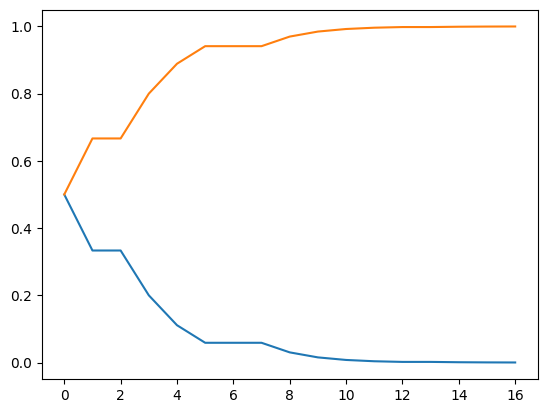

In [56]:
plt.plot(pM_Datos[0])
plt.plot(pM_Datos[1])

1.9. Leer los datos NoMontyHall.csv, proponer un modelo alternativo
superior a Monty Hall y el modelo Base, y evaluarlo en funci´on del
desempe˜no predictivo.



In [59]:
datosNoMonty = pd.read_csv("Materiales1/datos/NoMontyHall.csv")

In [60]:
datosNoMonty

,c,s,r
0,2,0,1
1,1,2,1
2,1,0,2
3,2,0,1
4,2,1,0
...,...,...,...
1995,1,2,0
1996,2,0,1
1997,1,0,2
1998,0,1,2
